# Abalone Case Study


**Problem Statement:**<br>
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

**Attribute Information**<br>


Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. <br>

Name / Data Type / Measurement Unit / Description<br>
-----------------------------
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being driedv. <br>
Rings / integer / -- / +1.5 gives the age in years. <br>

**We have to predict the rings of each abalone which will lead us to the age of that abalone.**

# Importing Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here, 'Rings' would be our target variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are **4177 rows** and **9 columns** along with our target column. There are **No Null values**<br>
There are 7 float values, target column in int and sex is categorical.

In [5]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Treating data and add column Age

There are no types of error in the dataset. Mean and median seem to have little difference. <br>
Let's encode the sex column so that we can include sex column in our analysis.

In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

The data is has a good distribution for sex column.

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**Female = 0, Infants = 1 and Male = 2**

Let's add "Age" column to the data by Adding Rings + 1.5

In [8]:
df['Age'] = df['Rings'] + 1.5

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


Added Age columns and will drop Rings columns for our convenience.

In [10]:
df = df.drop('Rings', axis=1)

In [11]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Let's visualize our data

<AxesSubplot:xlabel='Sex', ylabel='count'>

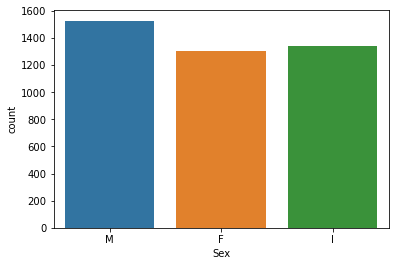

In [12]:
sns.countplot(df['Sex'])

Males entries are more, then Infants and then followed by Females.

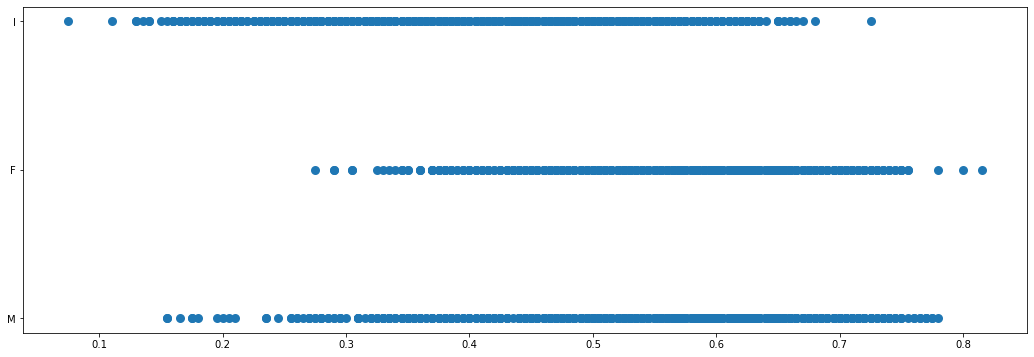

In [13]:
plt.figure(figsize=(18,6))
plt.scatter(df['Length'], df['Sex'], linewidth=3)

Female (0) have length from 0.3 to 0.8 mm.<br>
Infants (1) have length from 0.15 mm to 0.69 mm. <br>
Males (2)have length from 0.15 mm  to 0.8 mm.

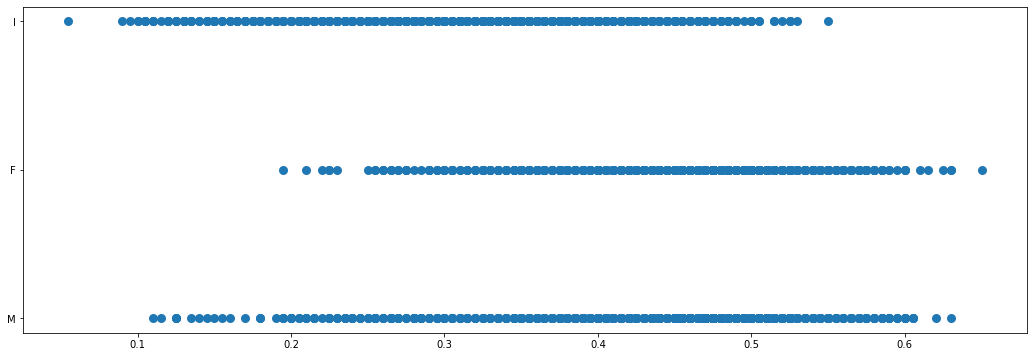

In [14]:
plt.figure(figsize=(18,6))
plt.scatter(df['Diameter'], df['Sex'], linewidth=3)

Female (0) have diameter from 0.2 to 0.67 mm.<br>
Infants (1) have diameter from 0.09 mm to 0.55 mm. <br>
Males (2)have diameter from 0.1 mm  to 0.62 mm.

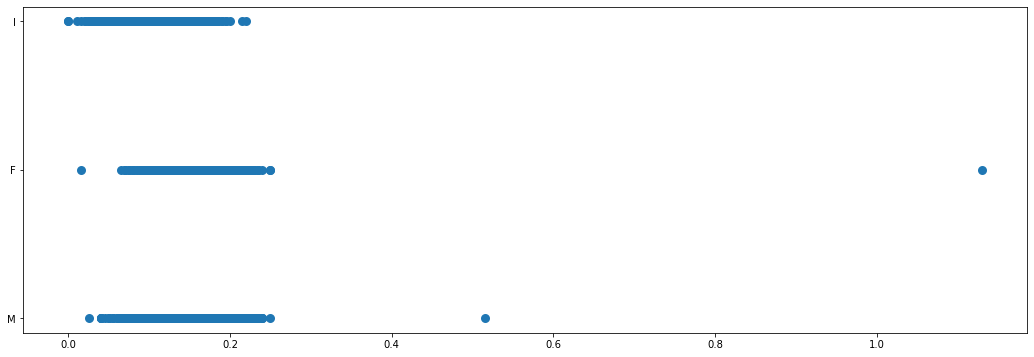

In [15]:
plt.figure(figsize=(18,6))
plt.scatter(df['Height'], df['Sex'], linewidth=3)

Female (0) have height from 0.03 to 0.23 mm.<br>
Infants (1) have height from 0.00 mm to 0.21 mm. <br>
Males (2)have height from 0.0 mm  to 0.21 mm.<br>

There are outliers in Male and Female categories

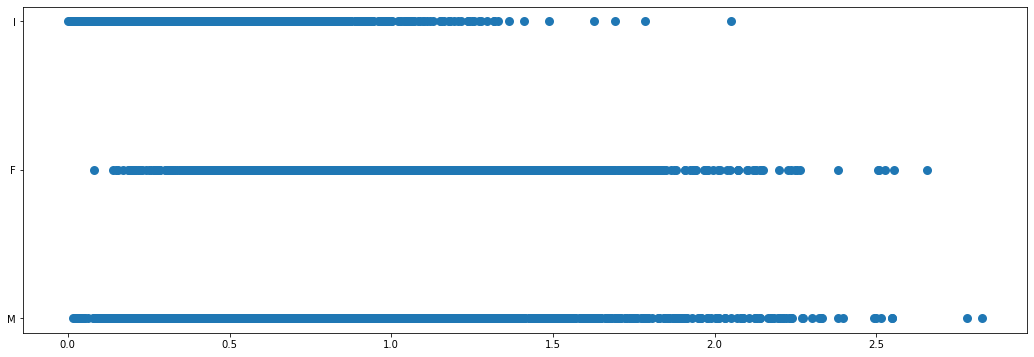

In [16]:
plt.figure(figsize=(18,6))
plt.scatter(df['Whole weight'], df['Sex'], linewidth=3)

Female (0) have Whole weight from 0.01 to 0.23 mm.<br>
Infants (1) have Whole weight from 0.00 mm to 0.14 mm. <br>
Males (2)have Whole weight from 0.0 mm  to 0.25 mm.<br>

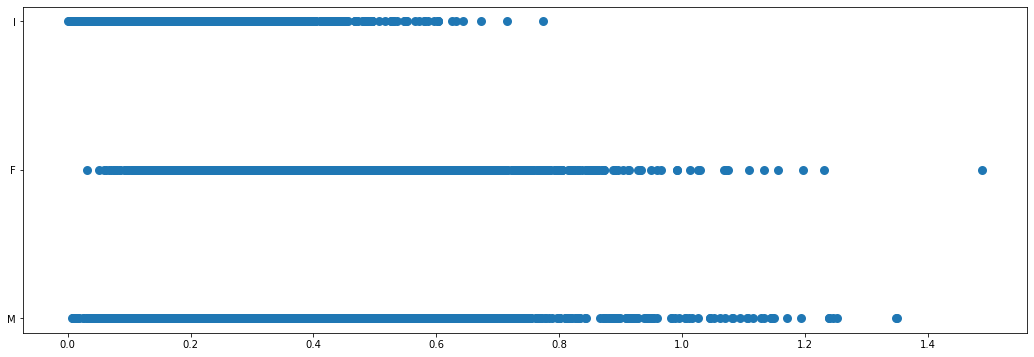

In [17]:
plt.figure(figsize=(18,6))
plt.scatter(df['Shucked weight'], df['Sex'], linewidth=3)

Female (0) have Shucked weight from 0.01 to 1.2 mm.<br>
Infants (1) have Shucked weight from 0.00 mm to 0.62 mm.<br>
Males (2)have Shucked weight from 0.0 mm to 1.2 mm.<br>

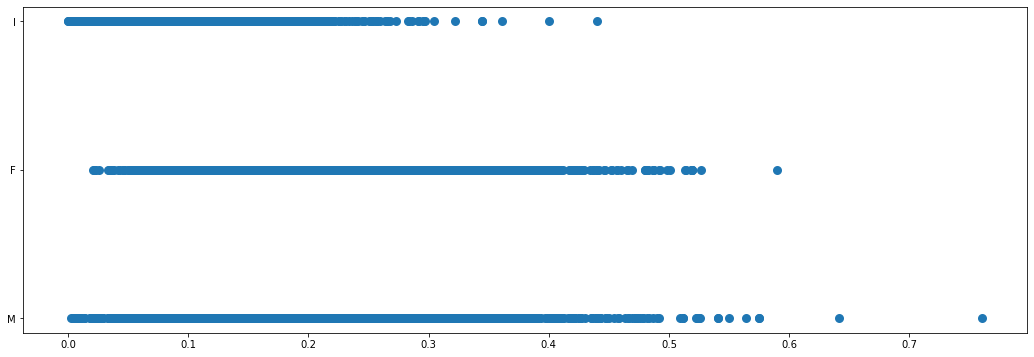

In [18]:
plt.figure(figsize=(18,6))
plt.scatter(df['Viscera weight'], df['Sex'], linewidth=3)

Female (0) have Viscera weight from 0.01 to 0.51 mm.<br>
Infants (1) have Viscera weight from 0.00 mm to 0.3 mm.<br>
Males (2)have Viscera weight from 0.0 mm to 0.5 mm.<br>

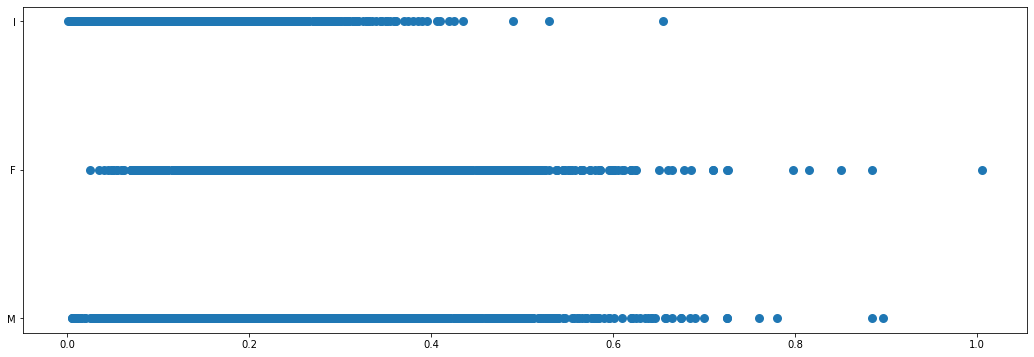

In [19]:
plt.figure(figsize=(18,6))
plt.scatter(df['Shell weight'], df['Sex'], linewidth=3)

Female (0) have Shell weight from 0.01 to 0.65 mm.<br>
Infants (1) have Shell weight from 0.00 mm to 0.41 mm.<br>
Males (2)have Shell weight from 0.0 mm to 0.78 mm.<br>

In [20]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

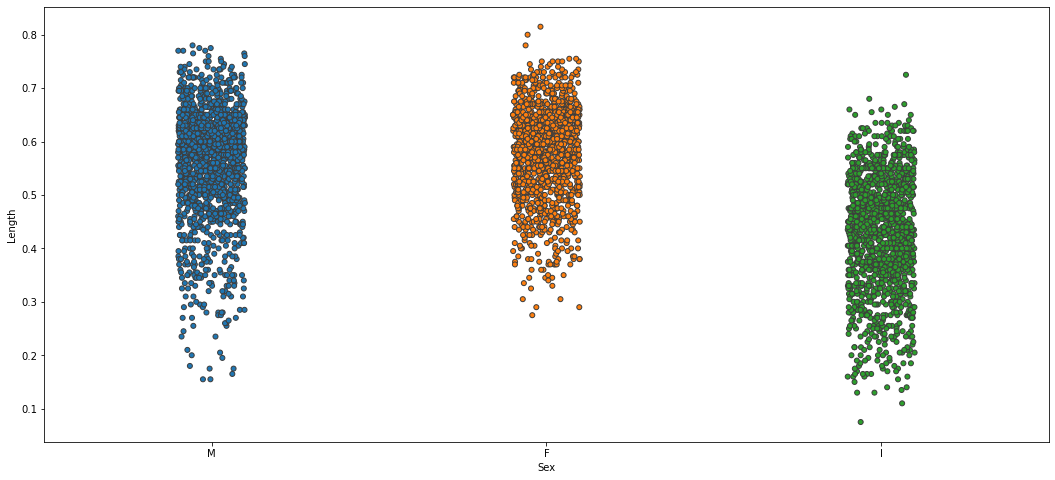

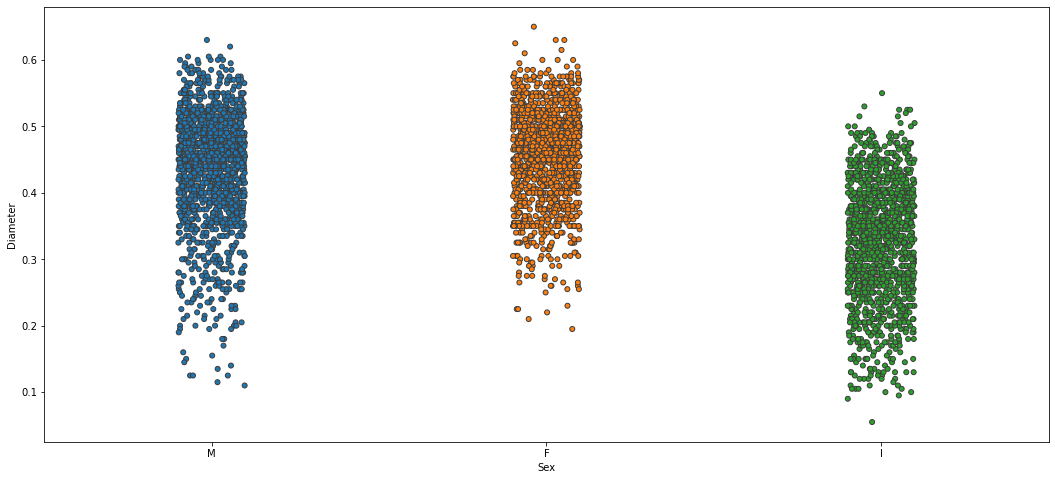

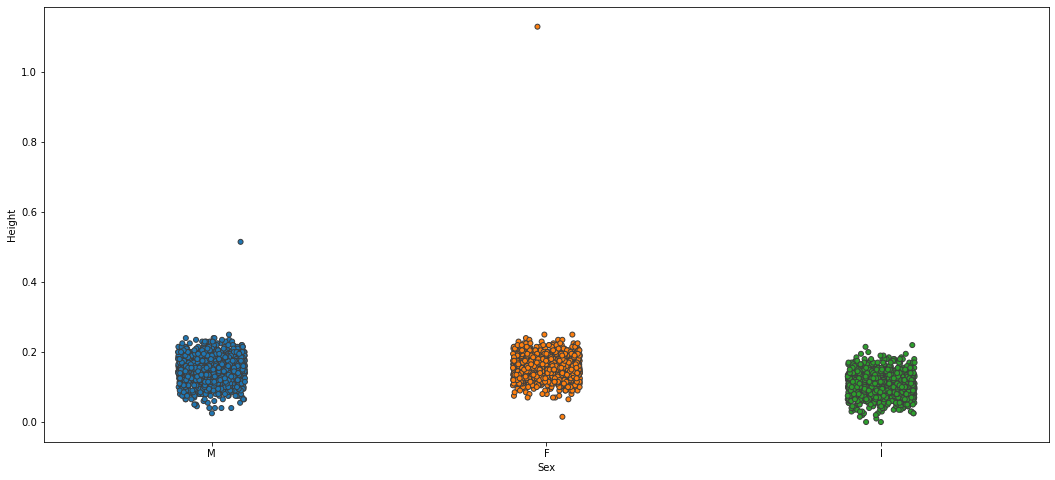

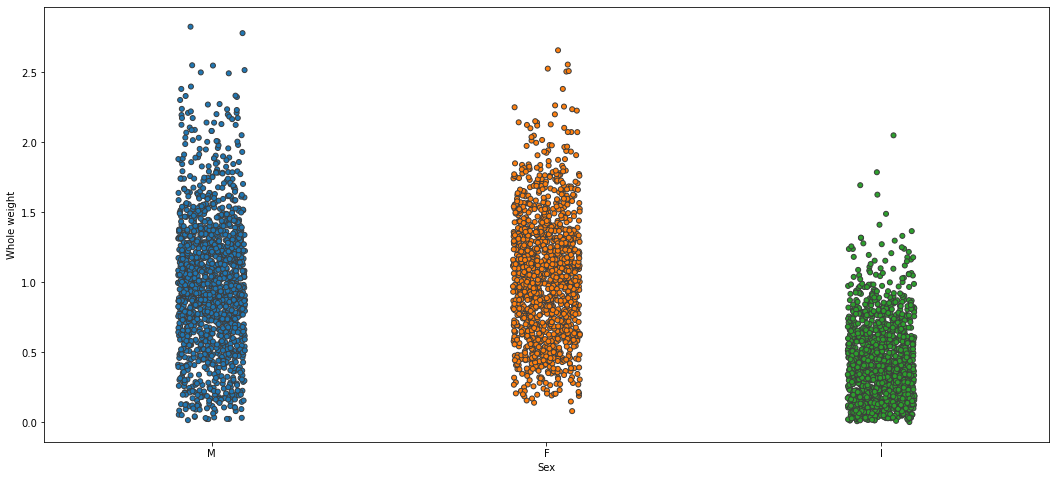

In [21]:
list = ['Length', 'Diameter', 'Height','Whole weight']
list1 = ['Shucked weight','Viscera weight', 'Shell weight']
for i in list:
    plt.figure(figsize=(18,8))
    sns.stripplot(data = df, x='Sex', y=i, linewidth=1)

These plots are more easy to visualize and looks good.<br>
**Observation:**<br>
1) **Length:** Nearly all the length are in same range, however, Infants have somewhat less Length.<br>
2) **Diameter:** Same goes with the Diameter however, Female have diameter no less than 0.2MM.<br>
3) **Height:** All the heights are same. We can see outliers in Female and Male have one outliers each.<br>
4) **Whole Weight:** Females and Males have this feature spread from 0.1-2.5 grams, Infants have a range from 0.1-1.4 grams.<br>

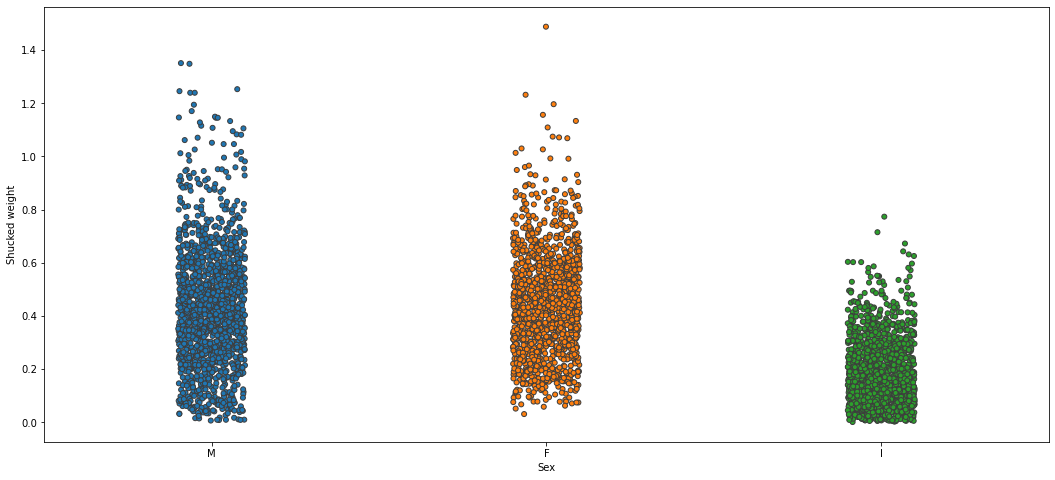

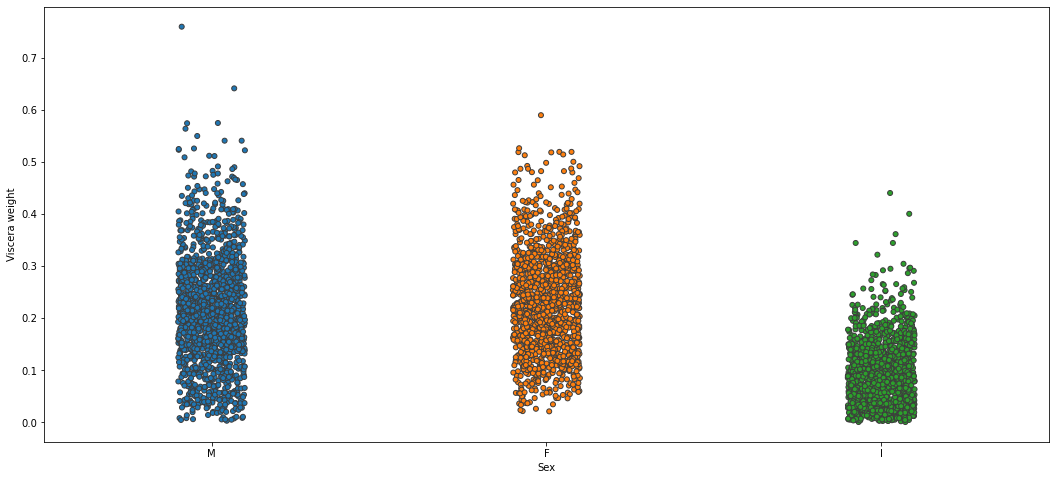

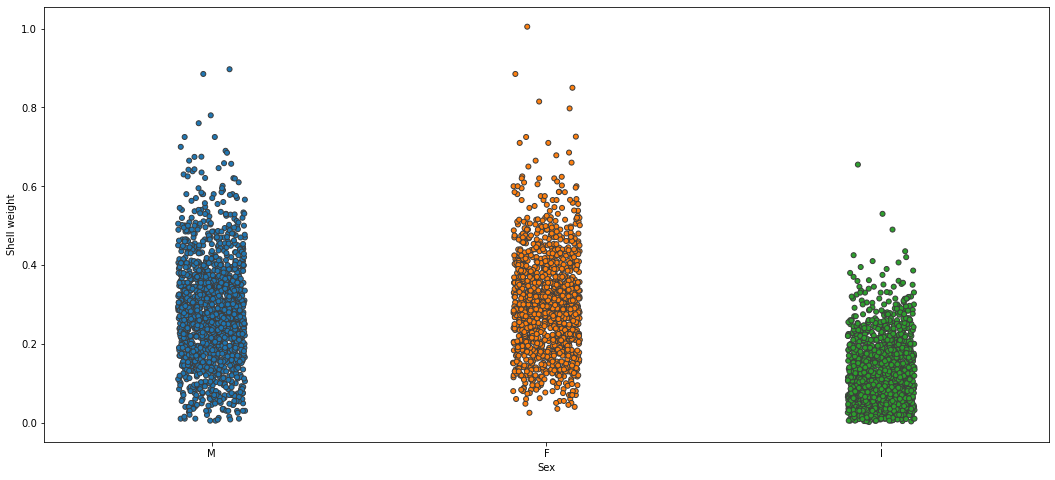

In [22]:
for i in list1:
    plt.figure(figsize=(18,8))
    sns.stripplot(data = df, x='Sex', y=i, linewidth=1)

**Observations:**<br>
1) **Shucked Weight:** Females and Males have a range of 0.1 to 1.2 grams, Infants have a range of 0.01 - 0.3 grams.<br>
2) **Viscera Weight:** Infants have less weight in this feature with range 0.01 - 0.25 grams. Males and Females have 0.2 - 0.51 grams.<br>
3) **Shell Weight:** Infants have less weight in this feature with range 0.01 - 0.39 grams. Males and Females have 0.2 - 0.61 grams.<br>

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

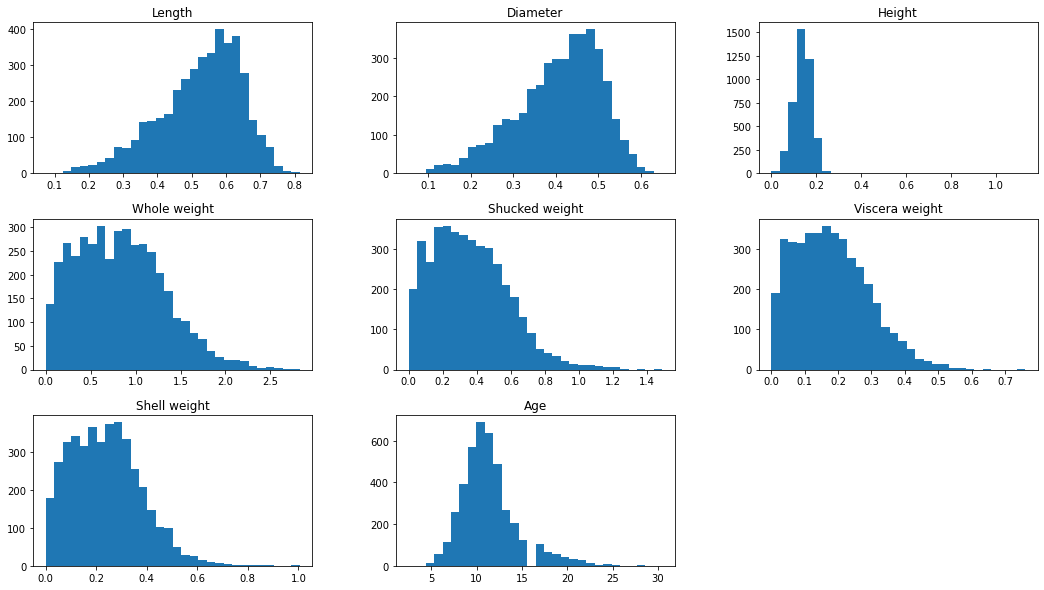

In [23]:
# Histogram visualisation for each attribute to know what kind of distribution it is?
df.hist(figsize=(18,10), grid=False, layout=(3,3), bins=30)

Columns Length and Diameter are left skewed and Whole weight, Shucked weight, Viscera weight and Shell weight are right skewed. <br>
These will be automatically treated when we remove outliers.

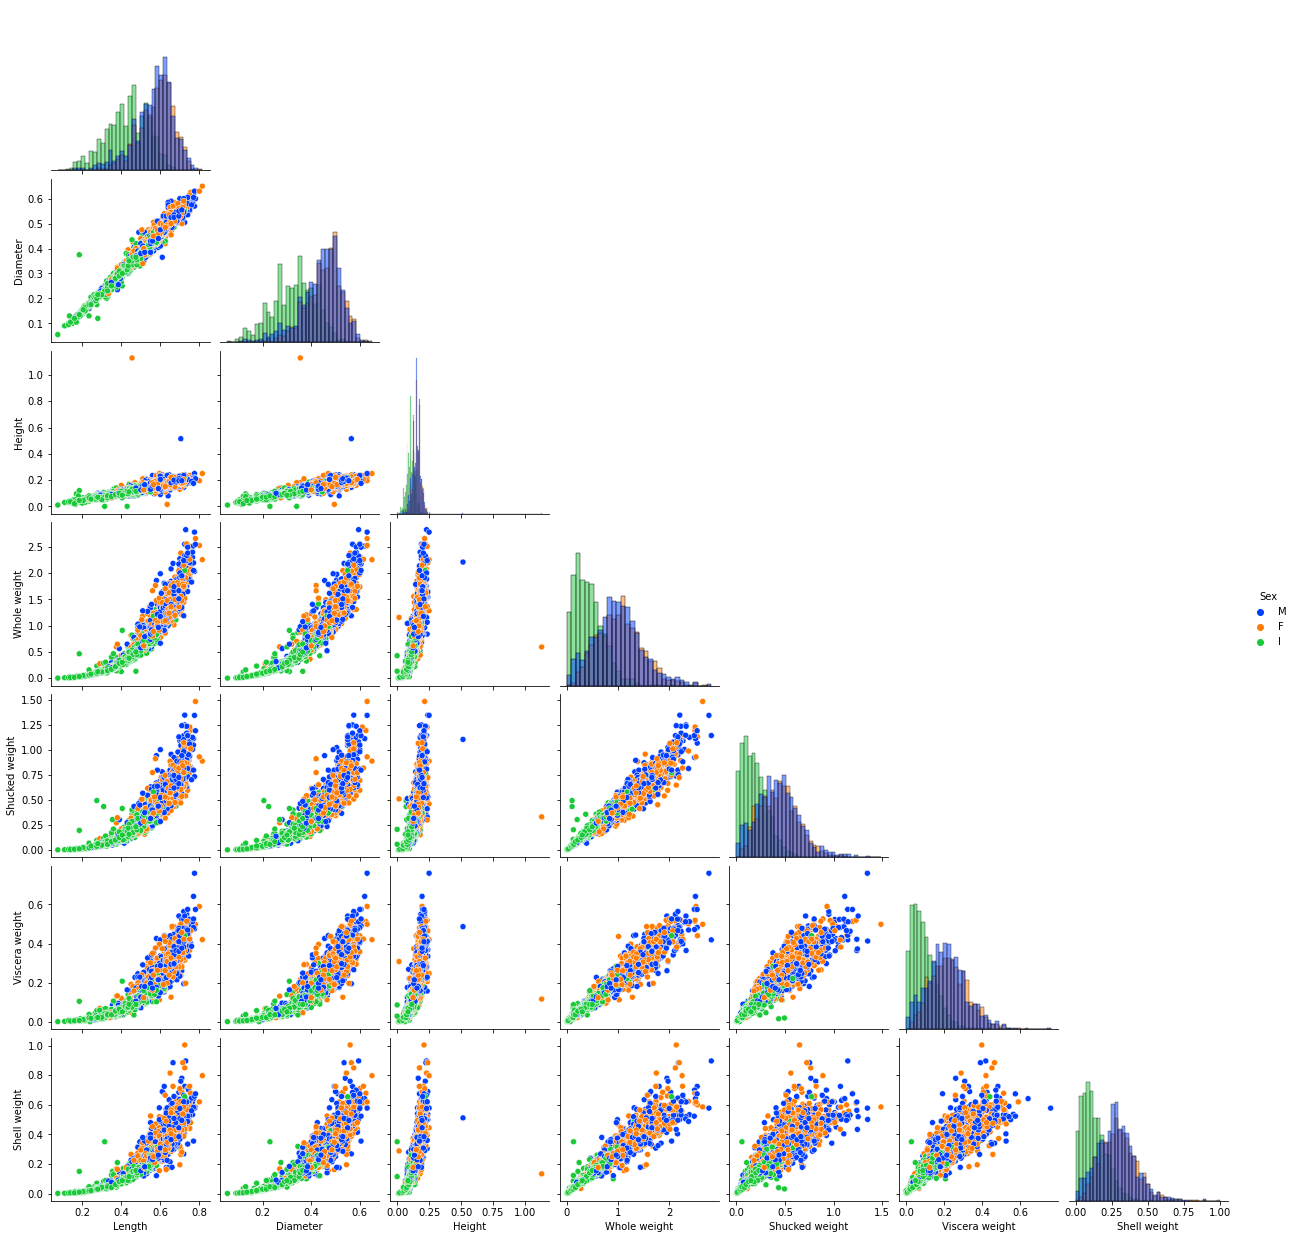

In [24]:
sns.pairplot(df.drop('Age',axis=1), hue="Sex", diag_kind="hist", palette="bright", corner=True)

**Observations:**<br>
1) Clearly Infants have less values in every feature whereas Males and Female have almost same range of values.<br>
2) As the length increases, all the features increases. Apart from height feature all the other feature have rapid increase in upwards direction.<br>
3) We can see few outliers in the columns.

<AxesSubplot:>

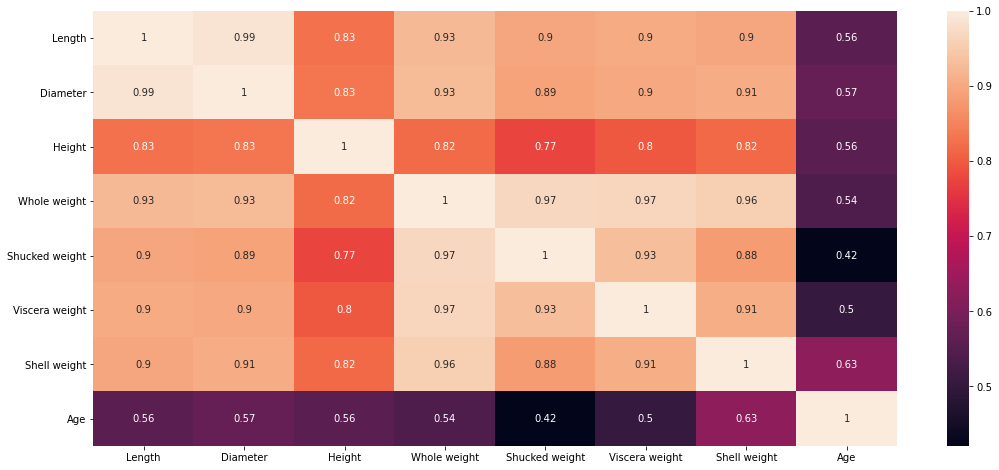

In [25]:
plt.figure(figsize= (18,8))
sns.heatmap(df.corr(), annot = True)

1) All the features show high correlations with  each other. **This would be a problem for our model building, as huge correlation between the independent variable may effect our model accuracy.**<br>
2) Whole weight has a very strong correlation with all the independent features. <br>
3) Age is has a good correlation with Shell Weight followed by Diameter and length<br>
4) Age is least correlated with Shucked Weight.<br>
5) Linear regression may not help we would need to use Decision Tree and Ensemble algorithms.

In [26]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].mean().sort_values('Age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


We can notice that Infants have less values in all features (Obviously), however, Males and Females have a very small change in all features. Females tends to have more weight and size when compared to Males.

# Outliers and Skewness

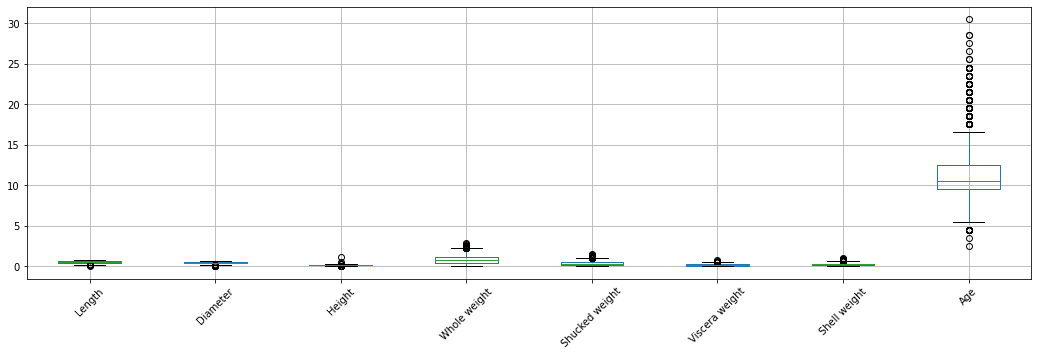

In [27]:
df.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

Only Age have outliers. However, lets look at each  columns and move forward both outliers and skewness.

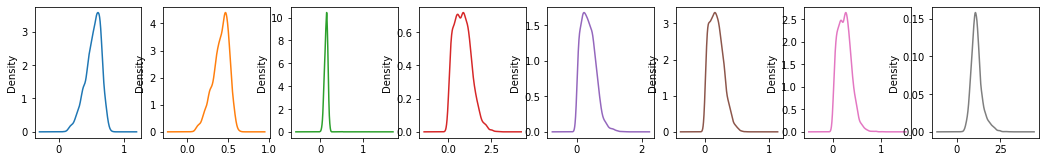

In [28]:
df.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(18,14))
plt.show()

In [29]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

In [30]:
#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

In [31]:
#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

In [32]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [33]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [34]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [35]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

In [36]:
#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

In [37]:
#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

In [38]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

# Column Length

<AxesSubplot:xlabel='Length', ylabel='Density'>

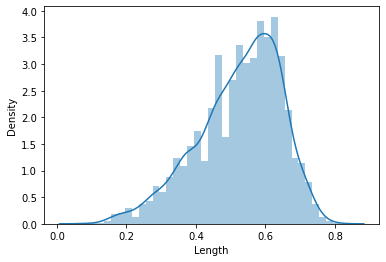

In [39]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Length'>

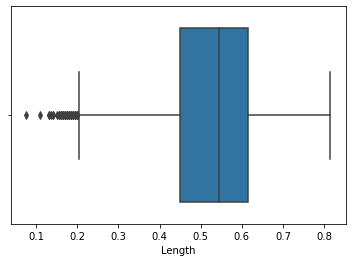

In [40]:
sns.boxplot(df['Length'])

In [41]:
outlier_normally(df, 'Length')

(0.1637133618986099, 0.8842708372874097)

In [42]:
df[df['Length']>0.8842708372874097].shape

(0, 9)

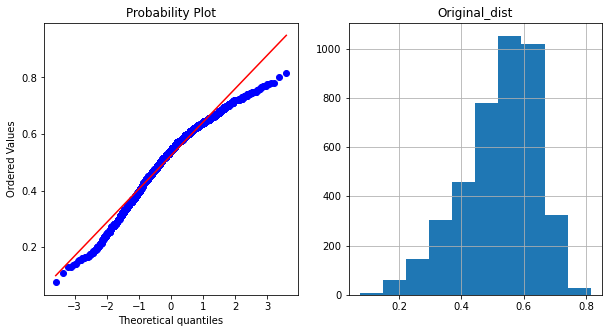

In [43]:
original_dist(df, 'Length')

Skweness is -0.64 and outlier under appreciable range.

# Column Diameter

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

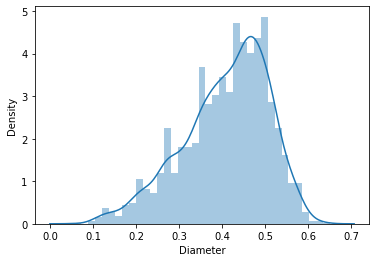

In [44]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Diameter'>

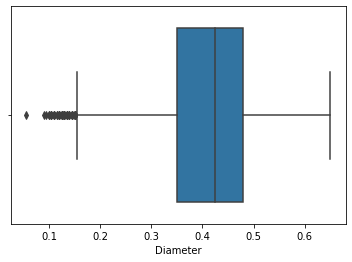

In [45]:
sns.boxplot(df['Diameter'])

In [46]:
outlier_normally(df, "Diameter")

(0.11016165608789152, 0.7056008528898465)

In [47]:
df[df['Diameter']>0.7056008528898465].shape

(0, 9)

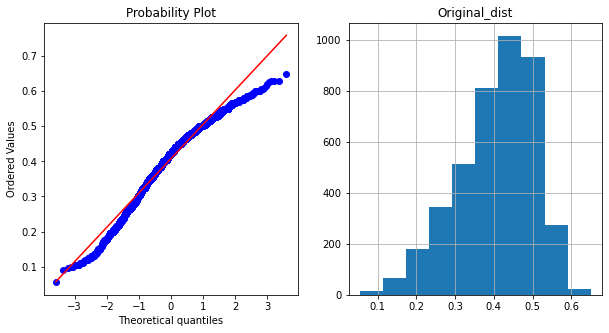

In [48]:
original_dist(df,"Diameter")

Skweness is -0.61 and outlier under appreciable range.

# Column height

<AxesSubplot:xlabel='Height', ylabel='Density'>

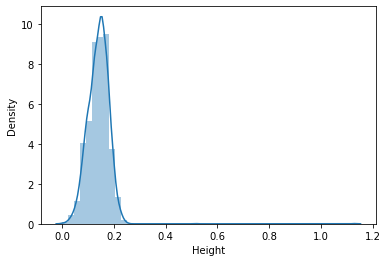

In [49]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

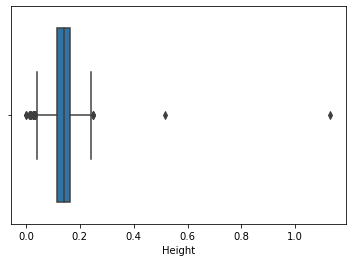

In [50]:
sns.boxplot(df['Height'])

In [51]:
outlier_normally(df,'Height')

(0.014035229507890296, 0.26499756915143247)

In [52]:
df[df['Height']>0.26499756915143247].shape

(2, 9)

In [53]:
df = df[df['Height']<=0.26499756915143247]

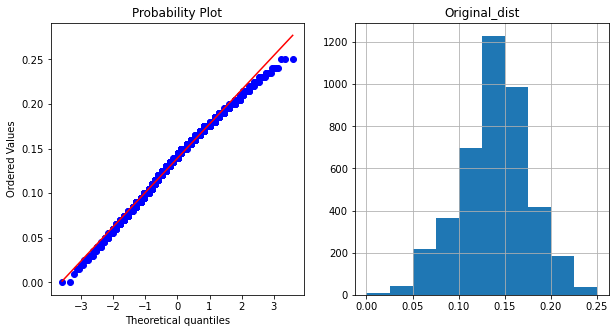

In [54]:
original_dist(df, 'Height')

In [55]:
df['Height'].skew()

-0.26453647401281966

Remove 2 rows which were outliers and skewness is alredy in check.

# Column Whole weight

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

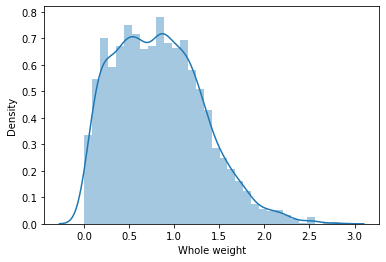

In [56]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Whole weight'>

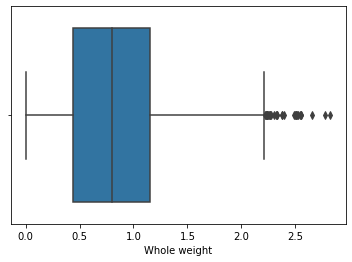

In [57]:
sns.boxplot(df['Whole weight'])

In [58]:
outlier_IQR(df,'Whole weight')

(-0.62575, 2.22025)

In [59]:
df[df['Whole weight']>2.22025].shape

(30, 9)

In [60]:
df = df[df['Whole weight']<=2.22025]

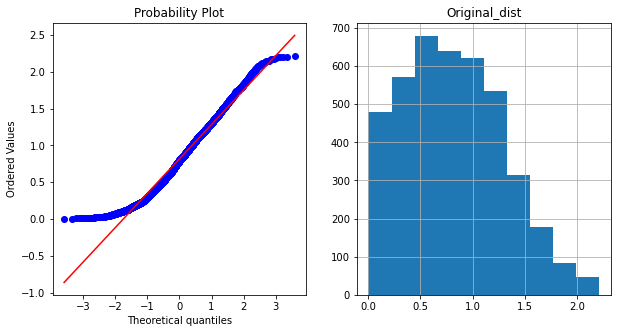

In [61]:
original_dist(df, 'Whole weight')

In [62]:
df['Whole weight'].skew()

0.3882792186473996

Removed 30 rows and skewness got in check after removal of outliers.

# Column Shucked weight

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

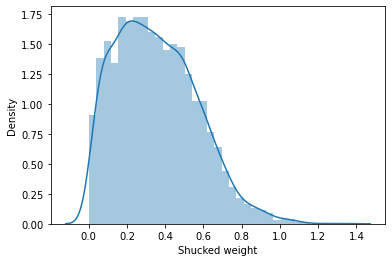

In [63]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Shucked weight'>

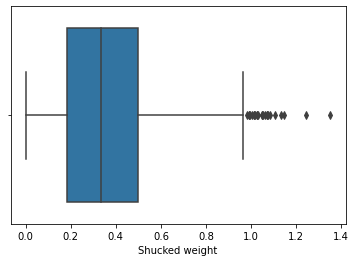

In [64]:
sns.boxplot(df['Shucked weight'])

In [65]:
outlier_IQR(df, 'Shucked weight')

(-0.28450000000000003, 0.9675)

In [66]:
df[df['Shucked weight']>0.9675].shape

(24, 9)

In [67]:
df = df[df['Shucked weight']<=0.9675]

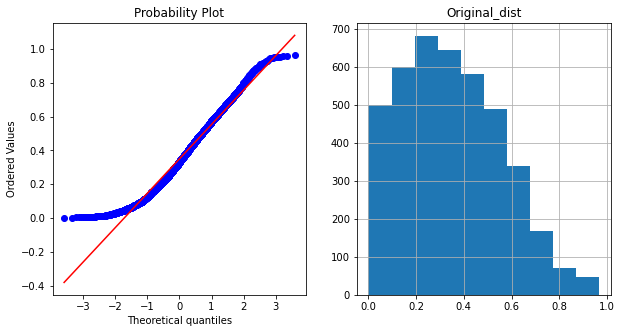

In [68]:
original_dist(df, 'Shucked weight')

In [69]:
df['Shucked weight'].skew()

0.41760527448066265

Removed 24 rows and skewness got in check after removal of outliers.

# Column Viscera weight

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

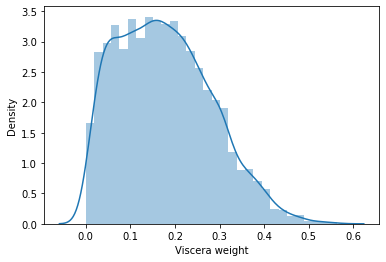

In [70]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Viscera weight'>

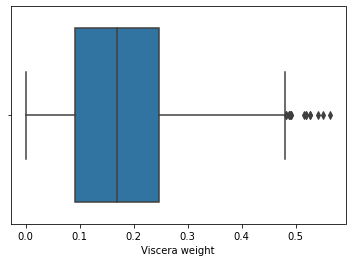

In [71]:
sns.boxplot(df['Viscera weight'])

In [72]:
outlier_IQR(df, "Viscera weight")

(-0.14125000000000001, 0.48075)

In [73]:
df[df['Viscera weight']>0.48075].shape

(15, 9)

In [74]:
df = df[df['Viscera weight']<=0.48075]

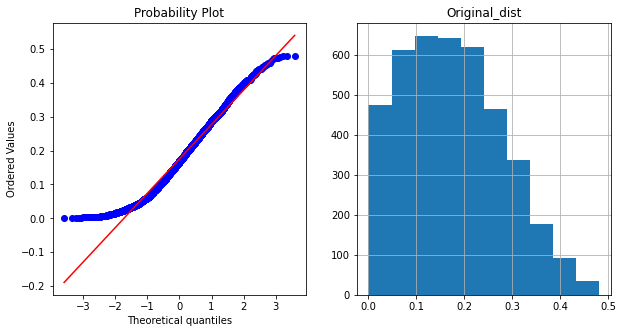

In [75]:
original_dist(df, 'Viscera weight')

In [76]:
df['Viscera weight'].skew()

0.393919002176635

Removed 15 rows and skewness got in check after removal of outliers.

# Column Shell weight

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

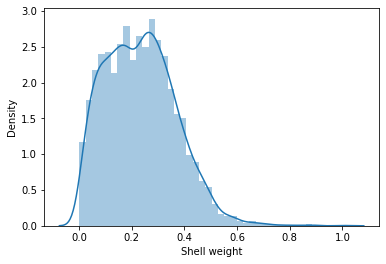

In [77]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Shell weight'>

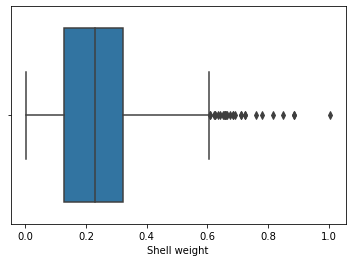

In [78]:
sns.boxplot(df['Shell weight'])

In [79]:
outlier_IQR(df, 'Shell weight')

(-0.15993750000000004, 0.6085625000000001)

In [80]:
df[df['Shell weight']>0.6085625000000001].shape

(28, 9)

In [81]:
df = df[df['Shell weight']<=0.6085625000000001]

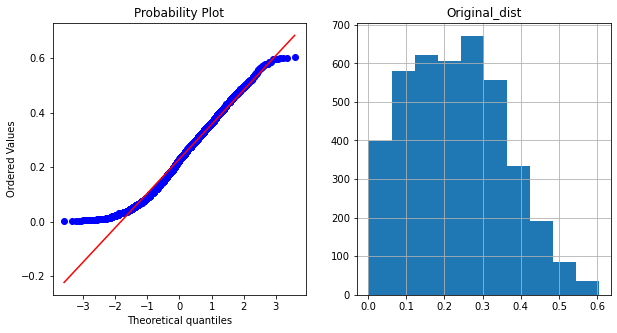

In [82]:
original_dist(df, 'Shell weight')

In [83]:
df['Shell weight'].skew()

0.2980664862376707

Removed 28 rows and skewness got in check after removal of outliers.

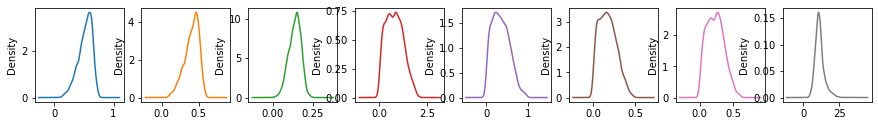

In [84]:
df.plot(kind="density", subplots =True, layout=(5,8), sharex=False, legend =False, figsize=(15,10))
plt.show()

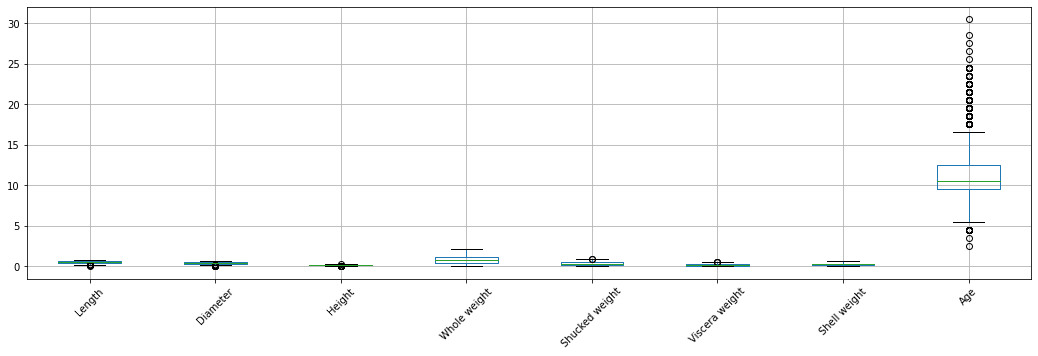

In [85]:
df.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

We may have a **MultiCollinearity problem** we will try to use **Tree and Ensemble algorithms**.<br>

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [87]:
x = df.drop("Age", axis=1)
y = df['Age']

# **Model Building**

## Finding the best random state for the model

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

Imported Metrics, algorithms and train_test_split.

## Finding the best Random state for our model

In [91]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.6301708626743594 on random state 177


We can see that the random state **177** is giving us **63.92%** confidence of good fit.<br>

## Best Algorithm for our problem.

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=177)

In [93]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 4.245632309566331
mean_absolute_error: 1.5110928176099305
r2_score: 0.6107321720228303
0.5108427236945178


In [94]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 7.786764705882353
mean_absolute_error: 1.9436274509803921
r2_score: 0.2860575850625834
1.0


In [95]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 4.011630637254902
mean_absolute_error: 1.4287254901960784
r2_score: 0.6321870027952576
0.931890121981463


In [96]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 4.657254901960784
mean_absolute_error: 1.4892156862745096
r2_score: 0.5729918730980543
0.6570972126429442


In [97]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 5.119192063173781
mean_absolute_error: 1.4787113355756378
r2_score: 0.5306383996231716
0.4605508075589624


In [98]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 6.478444774702899
mean_absolute_error: 2.108473496094648
r2_score: 0.40601306419390915
0.2904034783799937


# Regularization.

In [99]:
from sklearn.linear_model import Ridge,Lasso

In [100]:
r = Ridge()
r.fit(x_train,y_train)
pred = r.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 4.3851353406161895
mean_absolute_error: 1.5273904783061085
r2_score: 0.5979416056399028
0.4605508075589624


In [101]:
l = Lasso()
l.fit(x_train,y_train)
pred = l.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 10.908441667849516
mean_absolute_error: 2.4097450138853826
r2_score: -0.00015853588912695393
0.4605508075589624


These 2 algorithm do not have a good performance either. Expected low performance from Lasso.

Random forest Regressor has the lowest errors and good r2_score, comparetively. Let's perform cross validation.

## Crossvalidation

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.4277513827414833


In [104]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : -0.13798969394176813


In [105]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.41337925993155


In [106]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: 0.43032191274629117


In [107]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression:", lrc.mean())

Cross validation score of Logistic Regression: 0.403418798995963


Random Forest regressor has good performance in model and cross validation. Lets move to Hyper parameter tuning.

## Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
#Creating parameter list to pass in GridsearchCV

parameters = {'max_depth': np.arange(2,10), 'max_features':['auto','sqrt','log2'],
              'criterion':['mse','mae']}

In [110]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [111]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9, 'max_features': 'log2'}

## Model

In [112]:
model = RandomForestRegressor(criterion= 'mse', max_depth= 9,max_features='log2')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

62.414874078676434


## Saving the Model

In [113]:
import joblib
joblib.dump(model,"abalone_submission.pkl")

['abalone_submission.pkl']